In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [217]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [218]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning/Datasets/datos.csv')

In [219]:
#imprimimos el dataset
print(data)

           Precio Superficie
0      USD160.000        NaN
1      USD800.000    1443 m�
2      USD360.000      60 m�
3      USD275.000    5000 m�
4      USD850.000        NaN
..            ...        ...
201    USD320.000        NaN
202  USD1.351.993        NaN
203    USD600.000        NaN
204    USD231.000        NaN
205    USD777.855        NaN

[206 rows x 2 columns]


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Precio      206 non-null    object
 1   Superficie  137 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [221]:
#ELIMINAMOS COLUMNAS QUE DIFICULTEN EL CÁLCULO

In [222]:
columnas_eliminar = ['Precio']
simbolo = 'USD'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [223]:
columnas_eliminar = ['Superficie']
simbolo = '�'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Precio      206 non-null    object
 1   Superficie  137 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [225]:
#captando variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [226]:
#Procesamiento de las categoricas
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Precio      206 non-null    int64
 1   Superficie  206 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [228]:
# Lectura de Datos
X = data.iloc[:, :1]
y = data.iloc[:, 1]
m = y.size

In [229]:
print(X)
print(y)
print(m)

     Precio
0        29
1       137
2        87
3        68
4       140
..      ...
201      83
202       8
203     120
204      53
205     134

[206 rows x 1 columns]
0      114
1       30
2       89
3       81
4      114
      ... 
201    114
202    114
203    114
204    114
205    114
Name: Superficie, Length: 206, dtype: int64
206


In [230]:
#GRAFICAMOS DATOS

In [231]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio')
    pyplot.xlabel('Superficie')

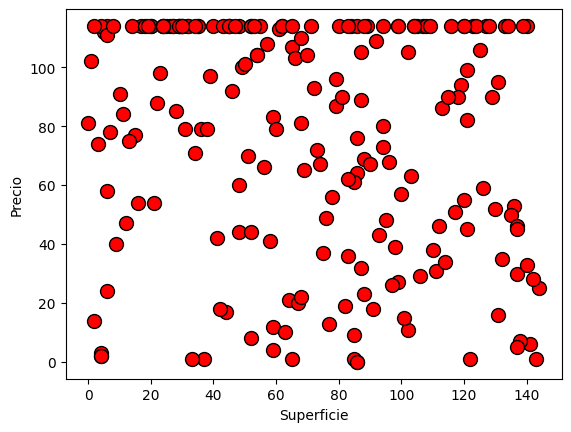

In [232]:
plotData(X, y)

In [233]:
print(X)
print('*'*2)
print(y)

     Precio
0        29
1       137
2        87
3        68
4       140
..      ...
201      83
202       8
203     120
204      53
205     134

[206 rows x 1 columns]
**
0      114
1       30
2       89
3       81
4      114
      ... 
201    114
202    114
203    114
204    114
205    114
Name: Superficie, Length: 206, dtype: int64


In [234]:
#INICIAMOS CON LA NORMALIZACIÓN

In [235]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [236]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Precio
0        29
1       137
2        87
3        68
4       140
..      ...
201      83
202       8
203     120
204      53
205     134

[206 rows x 1 columns]
Media calculada: Precio    70.354369
dtype: float64
Desviación estandar calculada: Precio    41.096331
dtype: float64
       Precio
0   -1.006279
1    1.621693
2    0.405039
3   -0.057289
4    1.694692
..        ...
201  0.307707
202 -1.517273
203  1.208031
204 -0.422285
205  1.548694

[206 rows x 1 columns]


In [237]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [238]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [239]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [240]:
fila_deseada = 1
if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
    print("la fila no existe")

[137  30]


theta calculado por el descenso por el gradiente: [74.68396455 -7.67180927]
El valor predecido es (usando el descenso por el gradiente): 10239.2364


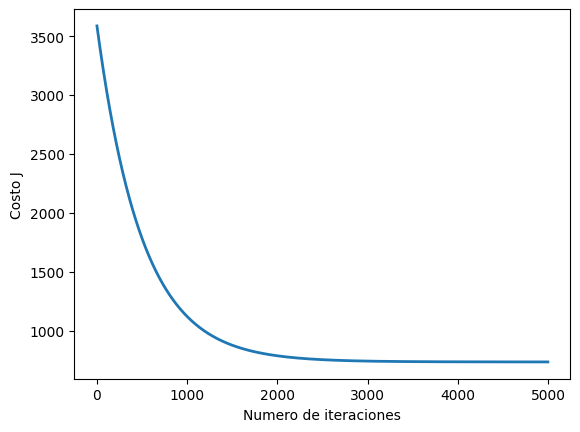

In [241]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(2)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [137,30]
X_array[1:2] = (X_array[1:2] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [242]:
X_array = [137,30]
X_array[1:2] = (X_array[1:2] - mu) / sigma

In [243]:
X_array[1:2]

[-0.9819457885933606]

In [244]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [245]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));


X_array = [137, 30]
price = np.dot(X_array, theta)

print('Precio predecido (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [75.18932039 -7.72372126]
Precio predecido (usando la ecuación de la normal): $10069


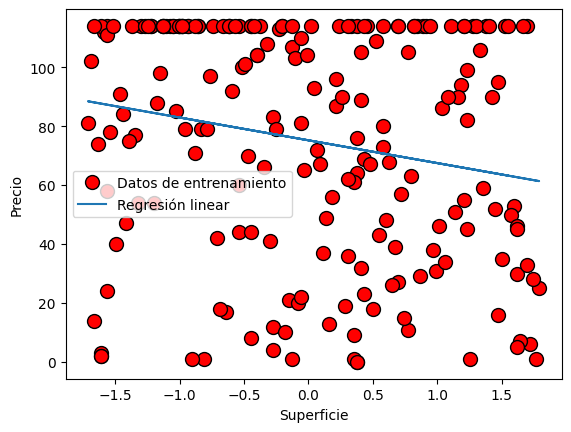

In [246]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);